In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from scipy.ndimage import gaussian_filter
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.naive_bayes import GaussianNB

from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GRU
from keras.utils import to_categorical
from keras.layers import Dropout

In [2]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [3]:
def analyse_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")

    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Accuracy : {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1 Score : {f1}')
    
    plot_confusion_matrix(conf_matrix)
    print("-"*100)
    print('Classification Report:')
    print(class_report)

In [4]:
def plot_precision_recall(y_test, y_score):
    n_classes = 6
    precision = dict()
    recall = dict()
    plt.figure(figsize=(5, 4))
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                            y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()

In [5]:
def plot_roc_curve(y_test, y_score):
    n_classes = 6
    fpr = dict()
    tpr = dict()
    plt.figure(figsize=(5, 4))
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                      y_score[:, i])
        plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="best")
    plt.title("ROC curve")
    plt.show()

# 1. Loading the Dataset 

In [6]:
pd.set_option("display.max_columns", None)

In [7]:
train_data = pd.read_csv(r"D:\Machine Learning Minor Project\Dataset\train.csv")
test_data = pd.read_csv(r"D:\Machine Learning Minor Project\Dataset\test.csv")

In [8]:
print(train_data.shape)
print(test_data.shape)

(7352, 563)
(2947, 563)


In [9]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [10]:
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

## Inferences

1. The two CSV files corresponding to Train and Test Data have been read into memory.
2. We have 7352 training samples and 2947 test samples.
3. We have a total of 563 columns in our Dataset, including the target variable.
4. We have 561 usable features including time domain, frequency domain and statistical features constructed from the sensor signals. 

# 2. Label Encoding the Target Variable

In [11]:
print("The classes in our dataset are:")
for cl in train_data['Activity'].unique():
    print(cl)

The classes in our dataset are:
STANDING
SITTING
LAYING
WALKING
WALKING_DOWNSTAIRS
WALKING_UPSTAIRS


In [12]:
temp_train = train_data.drop("subject", axis=1)
test_data = test_data.drop("subject", axis=1)

In [13]:
encoder = LabelEncoder()
encoder = encoder.fit(temp_train['Activity'])
y_train = encoder.transform(temp_train['Activity'])
y_test = encoder.transform(test_data['Activity'])

In [14]:
# Retrieve the mapping between labels and their encoded values
print("The label encoding is done as below:")
for class_label, code in zip(encoder.classes_, encoder.transform(encoder.classes_)):
    print(class_label, "-->", code)

The label encoding is done as below:
LAYING --> 0
SITTING --> 1
STANDING --> 2
WALKING --> 3
WALKING_DOWNSTAIRS --> 4
WALKING_UPSTAIRS --> 5


In [15]:
x_train = temp_train.drop("Activity", axis=1)
x_test = test_data.drop("Activity", axis=1)

## Inferences

1. There are a total of 6 classes in our Dataset
2. Label Encoding was done to convert the string class labels to integer class labels

# 3. Preliminary Analysis

In [16]:
x_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

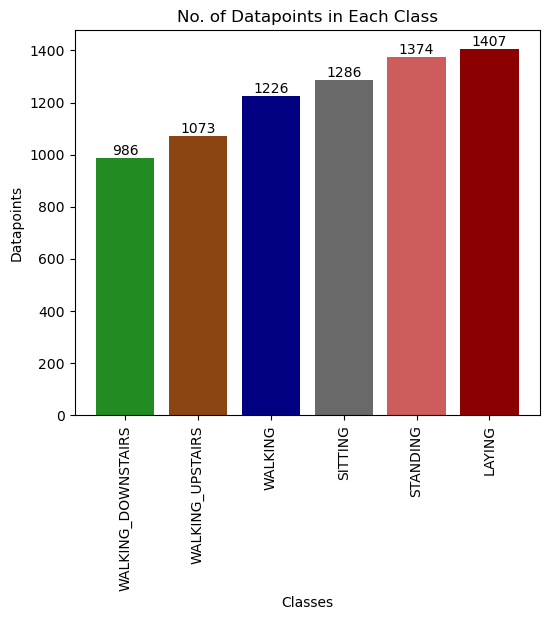

In [17]:
y = train_data['Activity'].value_counts().sort_values().to_list()
x = train_data['Activity'].value_counts().sort_values().index

plt.figure(figsize=(6, 5))
# Plotting the bar graph
plt.bar(x, y, color=['#228b22', '#8b4513', '#000080', '#696969', '#cd5c5c', '#8b0000'])

for i, value in enumerate(y):
    plt.text(x[i], value, str(value), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Classes')
plt.xticks(rotation='vertical')

plt.ylabel('Datapoints')
plt.title('No. of Datapoints in Each Class')

# Show the plot
plt.show()

## Inferences

1. All the features all scaled to be between -1 and +1.
2. There are no missing values in the Dataset. 
3. All the statistics of each feature is printed above.
4. There is class imbalance in the Dataset.
5. After dropping the "Subject" and "Activity" column, we have a total of 561 usable features.

# 4. Balancing the Dataset

In [18]:
#Before SMOTE
print("Total Number of Training Points :", len(x_train))
for class_label, points in zip(pd.Series(y_train).value_counts().index, pd.Series(y_train).value_counts().values):
    print("Class", class_label, "-->", points, "data points")

Total Number of Training Points : 7352
Class 0 --> 1407 data points
Class 2 --> 1374 data points
Class 1 --> 1286 data points
Class 3 --> 1226 data points
Class 5 --> 1073 data points
Class 4 --> 986 data points


In [19]:
#Balancing using SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [20]:
#After SMOTE
print("Total Number of Training Points :", len(x_train))
for class_label, points in zip(pd.Series(y_train).value_counts().index, pd.Series(y_train).value_counts().values):
    print("Class", class_label, "-->", points, "data points")

Total Number of Training Points : 8442
Class 2 --> 1407 data points
Class 1 --> 1407 data points
Class 0 --> 1407 data points
Class 3 --> 1407 data points
Class 4 --> 1407 data points
Class 5 --> 1407 data points


## Inferences

1. We have used SMOTE to solve the problem of class imbalance.
2. Now all the classes have equal number of samples because of upsampling with artificial samples.
3. The total number of samples has gone up from 7352 points to 8442 points.

# 5. Handling Noise in the Data

## 5.1. Adding Noise

In [21]:
# Function to add Gaussian noise to specified columns
def add_gaussian_noise(df, columns, noise_mean=0, noise_std=0.1):
    noisy_df = df.copy()
    for col in columns:
        noise = np.random.normal(loc=noise_mean, scale=noise_std, size=len(df))
        noisy_df[col] = df[col] + noise
    return noisy_df

In [22]:
# Function to add random spikes (outliers) to specified columns
def add_random_spikes(df, columns, spike_probability=0.05):
    spiked_df = df.copy()
    for col in columns:
        spikes = np.random.choice([0, -1.5, -1, 1, 1.5], size=len(df), p=[1 - spike_probability, spike_probability / 4, spike_probability / 4, spike_probability / 4, spike_probability / 4])
        spiked_df[col] = df[col] + spikes
    return spiked_df

In [23]:
noisy_data = add_gaussian_noise(x_train, x_train.columns, noise_mean=0, noise_std=0.05)
spiked_data = add_random_spikes(noisy_data, x_train.columns, spike_probability=0.2)

## 5.2. Removing Noise

In [24]:
# Function to remove Gaussian noise using Gaussian smoothing
def remove_gaussian_noise(df, columns, sigma=1):
    cleaned_df = df.copy()
    for col in columns:
        cleaned_df[col] = gaussian_filter(df[col], sigma=sigma)
    return cleaned_df

In [25]:
# Function to remove spikes (outliers) using median filtering
def remove_random_spikes(df, columns, kernel_size=3):
    cleaned_df = df.copy()
    for col in columns:
        cleaned_df[col] = median_filter(df[col], size=kernel_size)
    return cleaned_df

In [26]:
despiked_data = remove_random_spikes(spiked_data, x_train.columns, kernel_size=5)
cleaned_data = remove_gaussian_noise(despiked_data, x_train.columns, sigma=0.5)

In [27]:
x_train = cleaned_data

## Inferences

1. To better simulate the errors in real world sensor data, we have added noise to the data.
2. We have introduced Gaussian Noise and Random Spikes into the data.
3. We then try to clean the data using a Gaussian filter and a Median filter.
4. The parameters for these filters have been set after extensive experimentation. 

# 6. K-Nearest Neighbours Model

## 6.1. Training the Model

In [55]:
knn = KNeighborsClassifier()
param_dist = {
    'n_neighbors': np.arange(5, 16),
    'weights': ['uniform', 'distance']
}
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs = -1)

random_search.fit(x_train, y_train)

# Visualize the performance for different hyperparameters
results = random_search.cv_results_

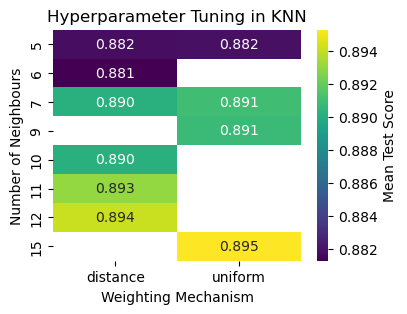

----------------------------------------------------------------------------------------------------
Best Hyperparameters: {'weights': 'uniform', 'n_neighbors': 15}


In [56]:
param_cols = ['param_' + param for param in param_dist.keys()]

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df = results_df[param_cols + ['mean_test_score']]

# Pivot the DataFrame for easy plotting
pivot_df = results_df.pivot_table(index=param_cols[0], columns=param_cols[1], values='mean_test_score')

# Create a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Test Score'})
plt.title('Hyperparameter Tuning in KNN')
plt.xlabel("Weighting Mechanism")
plt.ylabel("Number of Neighbours")
plt.show()

print("-"*100)
print("Best Hyperparameters:", random_search.best_params_)

In [57]:
# Evaluate the best model on the test set
best_model_knn = random_search.best_estimator_
y_pred_knn = best_model_knn.predict(x_test)

## 6.2. Analysing the Model

Accuracy : 0.8903970139124533
Precision : 0.8939645754750185
Recall : 0.8903970139124533
F1 Score : 0.8891508606777679


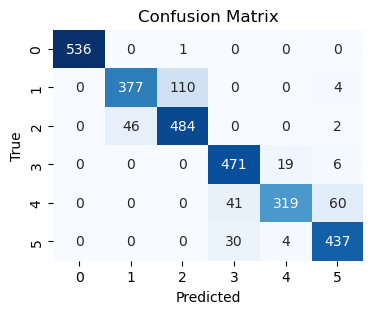

----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.89      0.77      0.82       491
           2       0.81      0.91      0.86       532
           3       0.87      0.95      0.91       496
           4       0.93      0.76      0.84       420
           5       0.86      0.93      0.89       471

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.89      0.89      2947



In [58]:
analyse_model(y_test, y_pred_knn)

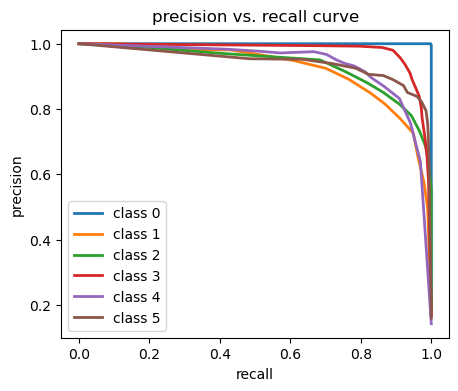

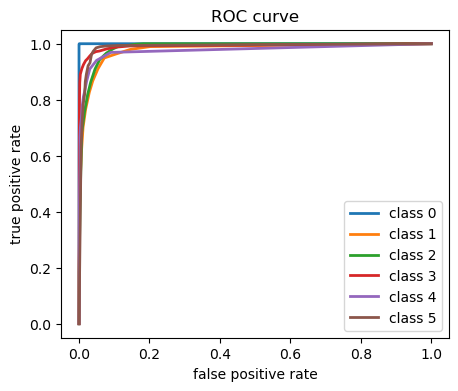

In [61]:
y_test_new = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
y_score = best_model_knn.predict_proba(x_test)

plot_precision_recall(y_test_new, y_score)
plot_roc_curve(y_test_new, y_score)

## Inferences

1. Different combinations of hyperparameters were tested. The hyperparameters considered here are - Number of Neighbours and Weighting Mechanism.
2. Setting Uniform weighting and choosing 15 nearest neighbours gave the best results.
3. The best model is analysed using a confusion matrix, precision-recall curve and roc curve.
4. We have managed to get an accuracy of 89 percent using the KNN model.

# 7. Multinomial Logistic Regression Model

## 7.1. Training the Model

In [62]:
# Create a logistic regression model for multi-class classification
logreg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter = 10000)

In [64]:
param_dist = {
    'C': np.round(np.logspace(-3, 2, 7),3),
    'penalty': ['l1', 'l2'],
    'max_iter': np.arange(5000, 7000, 10000)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs = -1)

# Fit the model to the data
random_search.fit(x_train, y_train)

# Visualize the performance for different hyperparameters
results = random_search.cv_results_

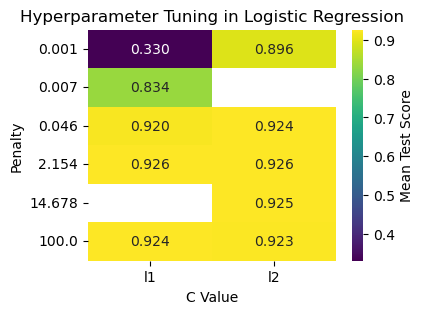

----------------------------------------------------------------------------------------------------
Best Hyperparameters: {'penalty': 'l1', 'max_iter': 5000, 'C': 2.154}


In [65]:
param_cols = ['param_' + param for param in param_dist.keys()]

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df = results_df[param_cols + ['mean_test_score']]

# Pivot the DataFrame for easy plotting
pivot_df = results_df.pivot_table(index=param_cols[0], columns=param_cols[1], values='mean_test_score')

# Create a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Test Score'})
plt.title('Hyperparameter Tuning in Logistic Regression')
plt.xlabel("C Value")
plt.ylabel("Penalty")
plt.show()

# Print the best hyperparameters
print("-"*100)
print("Best Hyperparameters:", random_search.best_params_)

In [66]:
# Evaluate the best model on the test set
best_model_lr = random_search.best_estimator_
y_pred_lr = best_model_lr.predict(x_test)

## 7.2. Analysing the Model

Accuracy : 0.9402782490668476
Precision : 0.940940837421896
Recall : 0.9402782490668476
F1 Score : 0.9403045936432399


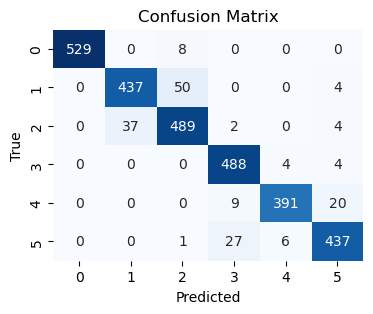

----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       537
           1       0.92      0.89      0.91       491
           2       0.89      0.92      0.91       532
           3       0.93      0.98      0.95       496
           4       0.98      0.93      0.95       420
           5       0.93      0.93      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



In [67]:
analyse_model(y_test, y_pred_lr)

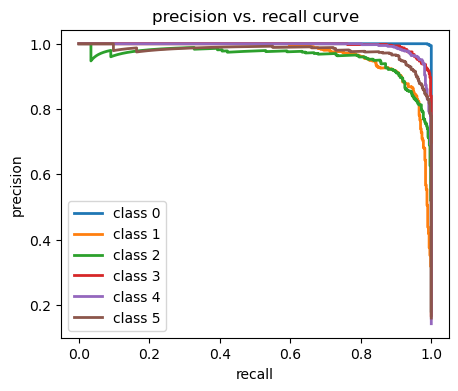

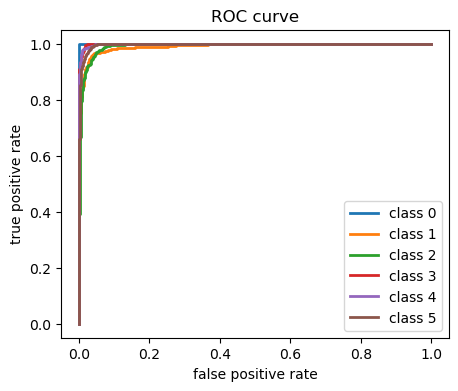

In [68]:
y_test_new = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
y_score = best_model_lr.predict_proba(x_test)

plot_precision_recall(y_test_new, y_score)
plot_roc_curve(y_test_new, y_score)

## Inferences

1. Different combinations of hyperparameters were tested. The hyperparameters considered here are - type of penalty and the inverse of regularization coefficient.
2. Setting L1 penalty and inverse of regularization coefficient as 2.154 gave the best results.
3. The best model is analysed using a confusion matrix, precision-recall curve and roc curve.
4. We have managed to get an accuracy of 94 percent using the Logistic Regression model.

# 8. Support Vector Machine Model using Clustering Information

## 8.1. K-Means Clustering

In [69]:
k = 6  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
kmeans.fit(x_train)

x_train_kmeans = kmeans.transform(x_train)
x_test_kmeans = kmeans.transform(x_test)

In [70]:
kmeans_distances_train = pd.DataFrame(x_train_kmeans)
kmeans_distances_train.columns =['cluster1_dist', 'cluster2_dist', 'cluster3_dist', 'cluster4_dist', 'cluster5_dist', 'cluster6_dist']

kmeans_distances_test = pd.DataFrame(x_test_kmeans)
kmeans_distances_test.columns =['cluster1_dist', 'cluster2_dist', 'cluster3_dist', 'cluster4_dist', 'cluster5_dist', 'cluster6_dist']

In [71]:
final_df_train = pd.concat([x_train, kmeans_distances_train], axis=1)
final_df_test = pd.concat([x_test, kmeans_distances_test], axis=1)

## 8.2. Training the Model

In [78]:
# Define the SVM model
svm = SVC(probability = True)

# Define the hyperparameter grid
param_dist = {
    'C': np.round(np.logspace(-3, 2, 7),3),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs = -1)

# Fit the model to the data
random_search.fit(final_df_train, y_train)
results = random_search.cv_results_

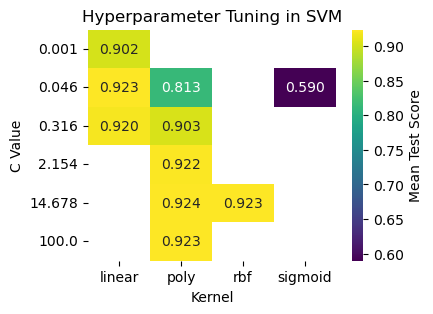

----------------------------------------------------------------------------------------------------
Best Hyperparameters: {'kernel': 'poly', 'C': 14.678}


In [79]:
# Visualize the performance for different hyperparameters

param_cols = ['param_' + param for param in param_dist.keys()]

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df = results_df[param_cols + ['mean_test_score']]

# Pivot the DataFrame for easy plotting
pivot_df = results_df.pivot_table(index=param_cols[0], columns=param_cols[1], values='mean_test_score')

# Create a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Test Score'})
plt.title('Hyperparameter Tuning in SVM')
plt.xlabel("Kernel")
plt.ylabel("C Value")
plt.show()

# Print the best hyperparameters
print("-"*100)
print("Best Hyperparameters:", random_search.best_params_)

In [80]:
# Evaluate the best model on the test set
best_model_svm = random_search.best_estimator_
y_pred_svm = best_model_svm.predict(final_df_test)

## 8.3. Analysing the Model

Accuracy : 0.9348489989820156
Precision : 0.9353993208287728
Recall : 0.9348489989820156
F1 Score : 0.934611094885993


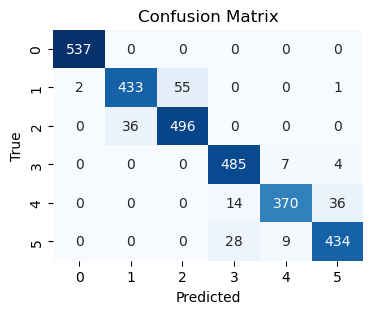

----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.92      0.88      0.90       491
           2       0.90      0.93      0.92       532
           3       0.92      0.98      0.95       496
           4       0.96      0.88      0.92       420
           5       0.91      0.92      0.92       471

    accuracy                           0.93      2947
   macro avg       0.94      0.93      0.93      2947
weighted avg       0.94      0.93      0.93      2947



In [81]:
analyse_model(y_test, y_pred_svm)

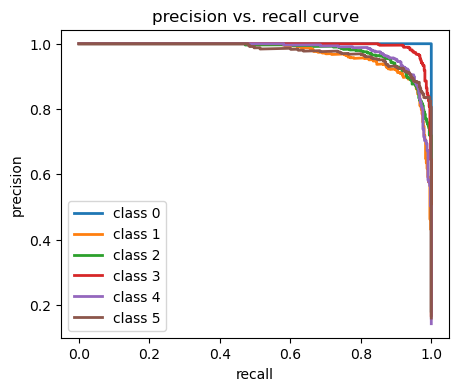

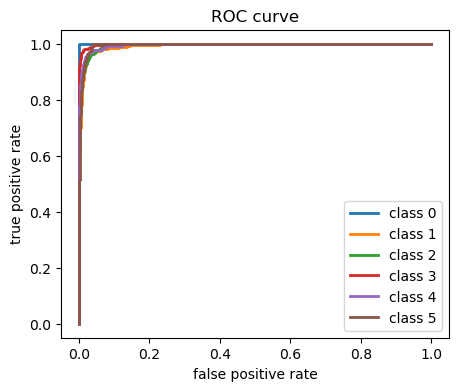

In [83]:
y_test_new = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
y_score = best_model_svm.predict_proba(final_df_test)

plot_precision_recall(y_test_new, y_score)
plot_roc_curve(y_test_new, y_score)

## Inferences

1. Different combinations of hyperparameters were tested. The hyperparameters considered here are - type of kernel and the inverse of regularization coefficient.
2. Setting a polynomial kernel and inverse of regularization coefficient as 14.678 gave the best results.
3. The best model is analysed using a confusion matrix, precision-recall curve and roc curve.
4. We have managed to get an accuracy of 93.4 percent using the SVM model with KMeans Clustering information.

# 9. Random Forest Model

## 9.1 Training the Model

In [84]:
# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': np.arange(50, 401, 50),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs = -1)

# Fit the model to the data
random_search.fit(x_train, y_train)

# Visualize the performance for different hyperparameters
results = random_search.cv_results_

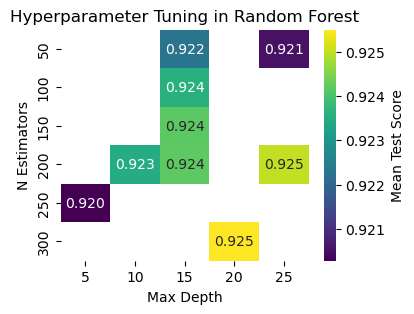

----------------------------------------------------------------------------------------------------
Best Hyperparameters: {'n_estimators': 250, 'max_depth': None}


In [86]:
param_cols = ['param_' + param for param in param_dist.keys()]

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df = results_df[param_cols + ['mean_test_score']]

# Pivot the DataFrame for easy plotting
pivot_df = results_df.pivot_table(index=param_cols[0], columns=param_cols[1], values='mean_test_score')

# Create a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Test Score'})
plt.title('Hyperparameter Tuning in Random Forest')
plt.xlabel("Max Depth")
plt.ylabel("N Estimators")
plt.show()

# Print the best hyperparameters
print("-"*100)
print("Best Hyperparameters:", random_search.best_params_)

In [87]:
# Evaluate the best model on the test set
best_model_rf = random_search.best_estimator_
y_pred_rf = best_model_rf.predict(x_test)

## 9.2 Analysing the Model

Accuracy : 0.9199185612487275
Precision : 0.921064263692434
Recall : 0.9199185612487275
F1 Score : 0.9194191382300116


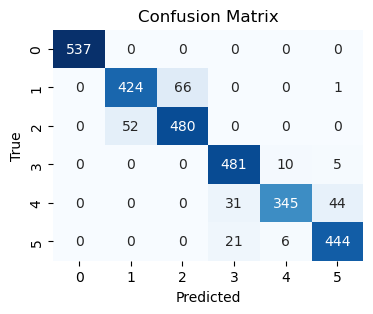

----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.89      0.86      0.88       491
           2       0.88      0.90      0.89       532
           3       0.90      0.97      0.93       496
           4       0.96      0.82      0.88       420
           5       0.90      0.94      0.92       471

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



In [88]:
analyse_model(y_test, y_pred_rf)

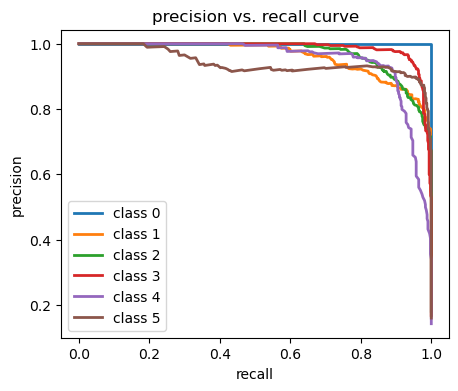

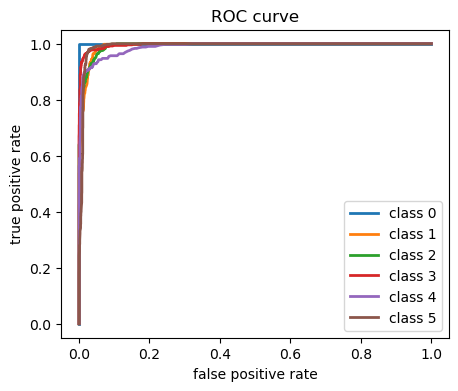

In [89]:
y_test_new = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
y_score = best_model_rf.predict_proba(x_test)

plot_precision_recall(y_test_new, y_score)
plot_roc_curve(y_test_new, y_score)

## Inferences

1. Different combinations of hyperparameters were tested. The hyperparameters considered here are - number of estimators and max depth of each estimator.
2. Setting max depth as "None" and number of estimators as 250 gave the best results.
3. The best model is analysed using a confusion matrix, precision-recall curve and roc curve.
4. We have managed to get an accuracy of 91.99 percent using the Random forest model.

# 10. Naive Bayes Classifier

## 10.1 Training the Model

In [92]:
# Train Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred_nb = nb_classifier.predict(x_test)

## 10.2 Analysing the Model

Accuracy : 0.8160841533763149
Precision : 0.826381644110559
Recall : 0.8160841533763149
F1 Score : 0.8113724594916999


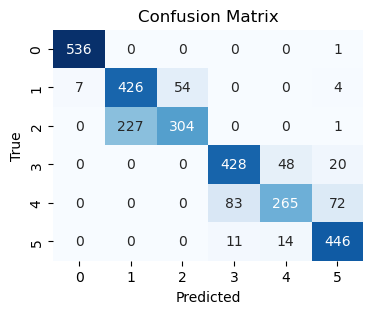

----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       537
           1       0.65      0.87      0.74       491
           2       0.85      0.57      0.68       532
           3       0.82      0.86      0.84       496
           4       0.81      0.63      0.71       420
           5       0.82      0.95      0.88       471

    accuracy                           0.82      2947
   macro avg       0.82      0.81      0.81      2947
weighted avg       0.83      0.82      0.81      2947



In [93]:
analyse_model(y_test, y_pred_nb)

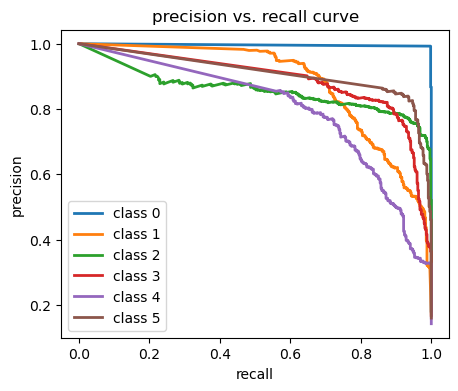

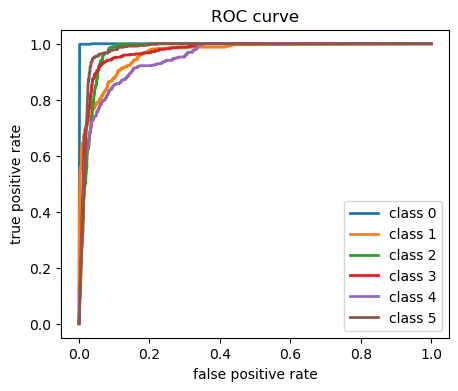

In [94]:
y_test_new = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
y_score = nb_classifier.predict_proba(x_test)

plot_precision_recall(y_test_new, y_score)
plot_roc_curve(y_test_new, y_score)

## Inferences

1. The probabilistic model Naive Bayes is implemented using the Gaussian Naive Bayes function.
2. The model is evaluated using confusion matrix, precision-recall curve and roc curve.
3. We have managed to get an accuracy of 81.60 percent using the Naive Bayes model.

# 11. Long Short Term Memory (LSTM) Model

## 11.1 Training the Model

In [28]:
def create_lstm_model(units=50, dropout_rate=0.2, input_shape=(x_train.shape[1], 1), num_classes=len(encoder.classes_)):
    model = Sequential()
    model.add(LSTM(units, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
lstm_model = KerasClassifier(units=50, dropout_rate=0.2, build_fn=create_lstm_model, epochs=10, batch_size=64, verbose=1)

# Define the hyperparameter grid
param_dist = {
    'units': [50, 100],
    'dropout_rate': [0.4, 0.6]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(lstm_model, param_distributions=param_dist, n_iter=4, cv=3, scoring='accuracy', random_state=42, n_jobs = -1)

# Reshape X_train for LSTM input (samples, timesteps, features)
x_train_reshaped = np.array(x_train).reshape((x_train.shape[0], x_train.shape[1], 1))

# One-hot encode the target labels
y_train_lstm = to_categorical(y_train)
y_test_lstm = to_categorical(y_test)

# Fit the model to the data
random_search.fit(x_train_reshaped, y_train_lstm, verbose=1)

# Visualize the performance for different hyperparameters
results = random_search.cv_results_

C:\Users\rsaik\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
132/132 [==============================] - 75s 555ms/step - loss: 1.7198 - accuracy: 0.2338
Epoch 2/10
132/132 [==============================] - 99s 752ms/step - loss: 1.2031 - accuracy: 0.4122
Epoch 3/10
132/132 [==============================] - 101s 763ms/step - loss: 0.9494 - accuracy: 0.5616
Epoch 4/10
132/132 [==============================] - 102s 771ms/step - loss: 0.7258 - accuracy: 0.6855
Epoch 5/10
132/132 [==============================] - 95s 721ms/step - loss: 0.6796 - accuracy: 0.7080
Epoch 6/10
132/132 [==============================] - 100s 756ms/step - loss: 0.6282 - accuracy: 0.7379
Epoch 7/10
132/132 [==============================] - 101s 764ms/step - loss: 0.6039 - accuracy: 0.7464
Epoch 8/10
132/132 [==============================] - 96s 730ms/step - loss: 0.5724 - accuracy: 0.7706
Epoch 9/10
132/132 [==============================] - 100s 757ms/step - loss: 0.5258 - accuracy: 0.7863
Epoch 10/10
132/132 [==============================] - 107s 809ms/st

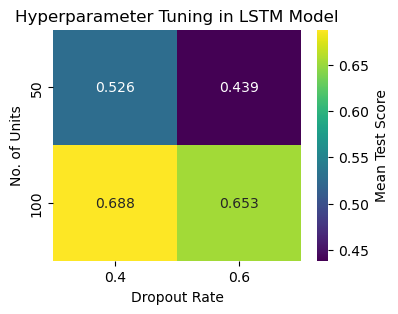

----------------------------------------------------------------------------------------------------
Best Hyperparameters: {'units': 100, 'dropout_rate': 0.4}


In [29]:
param_cols = ['param_' + param for param in param_dist.keys()]

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df = results_df[param_cols + ['mean_test_score']]

# Pivot the DataFrame for easy plotting
pivot_df = results_df.pivot_table(index=param_cols[0], columns=param_cols[1], values='mean_test_score')

# Create a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Test Score'})
plt.title('Hyperparameter Tuning in LSTM Model')
plt.xlabel("Dropout Rate")
plt.ylabel("No. of Units")
plt.show()

# Print the best hyperparameters
print("-"*100)
print("Best Hyperparameters:", random_search.best_params_)

In [40]:
# Evaluate the best model on the test set
best_model_lstm = random_search.best_estimator_
x_test_reshaped = np.array(x_test).reshape((x_test.shape[0], x_test.shape[1], 1))
y_pred_lstm = np.argmax(best_model_lstm.predict(x_test_reshaped), axis=1)
y_true = np.argmax(y_test_lstm, axis=1)

47/47 [==============================] - 8s 161ms/step


## 11.2 Analysing the Model

Accuracy : 0.8089582626399728
Precision : 0.8233638647470005
Recall : 0.8089582626399728
F1 Score : 0.8087131597560941


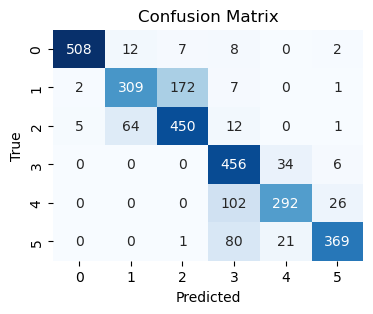

----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       537
           1       0.80      0.63      0.71       491
           2       0.71      0.85      0.77       532
           3       0.69      0.92      0.79       496
           4       0.84      0.70      0.76       420
           5       0.91      0.78      0.84       471

    accuracy                           0.81      2947
   macro avg       0.82      0.80      0.81      2947
weighted avg       0.82      0.81      0.81      2947



In [41]:
analyse_model(y_true, y_pred_lstm)

47/47 [==============================] - 7s 154ms/step


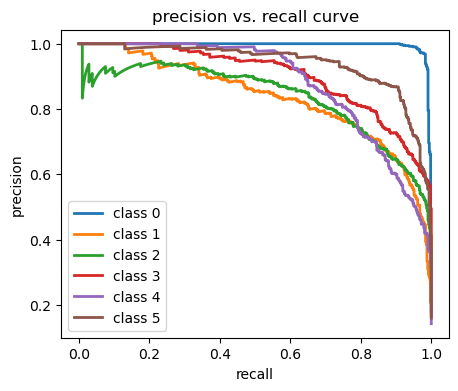

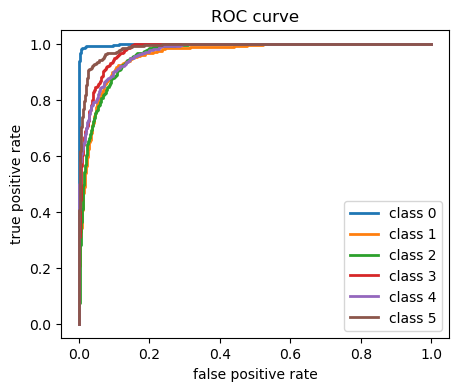

In [44]:
y_score = best_model_lstm.predict_proba(x_test_reshaped)

plot_precision_recall(y_test_lstm, y_score)
plot_roc_curve(y_test_lstm, y_score)

## Inferences

1. Different combinations of hyperparameters were tested. The hyperparameters considered here are - number of LSTM units and the drop out rate.
2. Setting numbner of LSTM units as 100 and the drop out rate as 0.4 gave the best results.
3. The best model is analysed using a confusion matrix, precision-recall curve and roc curve.
4. We have managed to get an accuracy of 80.89 percent using the LSTM model.

# 12. Multi Layered Perceptron Model

## 12.1 Training the Model

In [32]:
# Define the model
mlp_model = Sequential()

# Add layers to the model
mlp_model.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(len(encoder.classes_), activation='softmax'))  # Number of classes based on the unique activities

# Compile the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
mlp_model.summary()

mlp_model.fit(x_train, y_train, epochs= 10, batch_size= 64)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               143872    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 6)                 390       
                                                                 
Total params: 185,414
Trainable params: 185,414
Non-tr

In [38]:
y_pred_prob_mlp = mlp_model.predict(x_test)
y_pred_classes_mlp = np.argmax(y_pred_prob_mlp, axis=1)

93/93 [==============================] - 0s 2ms/step


## 12.2 Analysing the Model

Accuracy : 0.9304377332880895
Precision : 0.9341577478828614
Recall : 0.9304377332880895
F1 Score : 0.9300398601269454


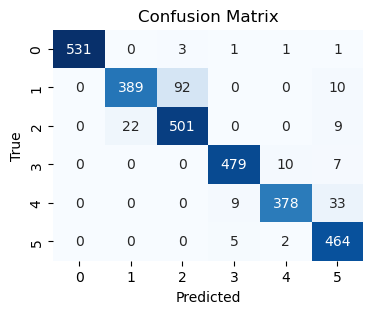

----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       537
           1       0.95      0.79      0.86       491
           2       0.84      0.94      0.89       532
           3       0.97      0.97      0.97       496
           4       0.97      0.90      0.93       420
           5       0.89      0.99      0.93       471

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



In [39]:
analyse_model(y_test, y_pred_classes_mlp)

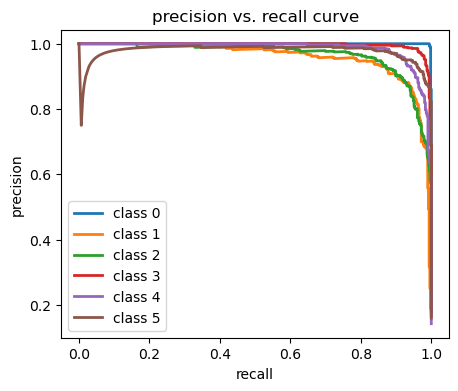

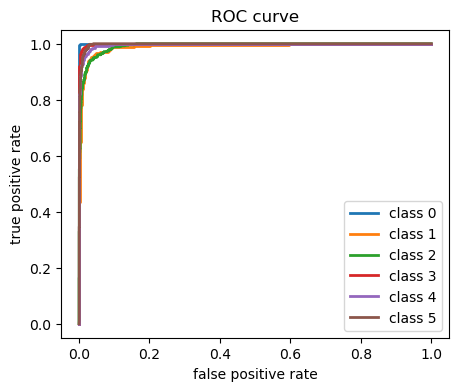

In [40]:
y_test_new = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

plot_precision_recall(y_test_new, y_pred_prob_mlp)
plot_roc_curve(y_test_new, y_pred_prob_mlp)

## Inferences

1. The simple multi layered perceptron model is implemented using Keras.
2. The model is analysed using confusion matrix, precision-recall curve and roc curve.
3. We have managed to get an accuracy of 93.04 percent using the MLP model.

# 13. Gated Recurrent Unit Model

## 13.1 Training the Model

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Define the model
model = Sequential()

# GRU layers
model.add(GRU(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(GRU(64, return_sequences=True))
model.add(GRU(64, return_sequences=False))  # The last GRU layer doesn't need return_sequences=True

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes for human activity recognition

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_16 (GRU)                (None, 561, 64)           12864     
                                                                 
 gru_17 (GRU)                (None, 561, 64)           24960     
                                                                 
 gru_18 (GRU)                (None, 64)                24960     
                                                                 
 dense_31 (Dense)            (None, 128)               8320      
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 6)                 390       
                                                                 
Total params: 79,750
Trainable params: 79,750
Non-tra

In [62]:
y_pred_prob_gru = model.predict(x_test)
y_pred_classes_gru = np.argmax(y_pred_prob_gru, axis=1)

93/93 [==============================] - 17s 175ms/step


## 13.2 Analysing the Model

Accuracy : 0.8523922633186292
Precision : 0.8570041686223896
Recall : 0.8523922633186292
F1 Score : 0.8517394261413362


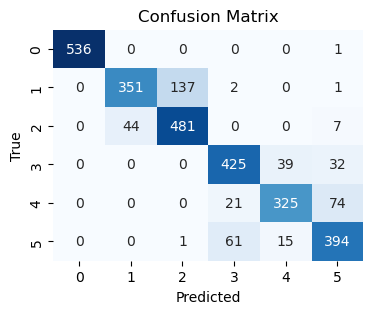

----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.89      0.71      0.79       491
           2       0.78      0.90      0.84       532
           3       0.83      0.86      0.85       496
           4       0.86      0.77      0.81       420
           5       0.77      0.84      0.80       471

    accuracy                           0.85      2947
   macro avg       0.86      0.85      0.85      2947
weighted avg       0.86      0.85      0.85      2947



In [63]:
analyse_model(y_test, y_pred_classes_gru)

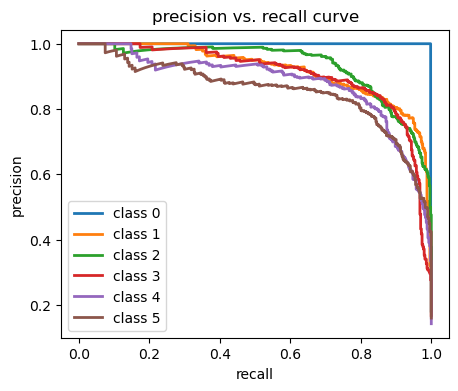

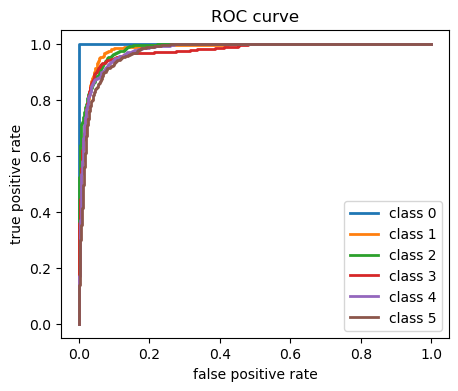

In [64]:
y_test_new = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

plot_precision_recall(y_test_new, y_pred_prob_gru)
plot_roc_curve(y_test_new, y_pred_prob_gru)

## Inferences

1. The GRU model with 3 GRU layers and 2 dense layers is implemented using Keras.
2. The model is analysed using a confusion matrix, precision-recall curve and roc curve.
3. We have managed to get an accuracy of 85.23 percent using the GRU model.

# 14. Comparison of Models

In [65]:
from prettytable import PrettyTable, ALL

table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
table.title = "Model Performance Comparison"
table.hrules = ALL

table.add_row(["KNN", round(0.89039, 4), round(0.89396, 4), round(0.8903, 4), round(0.8891, 4)])
table.add_row(["Multinomial Logistic Regression", round(0.9402, 4), round(0.9409, 4), round(0.9402, 4), round(0.9403, 4)])
table.add_row(["SVM with KMeans Clustering", round(0.9348, 4), round(0.9353, 4), round(0.9348, 4), round(0.9346, 4)])
table.add_row(["Random Forest", round(0.9199, 4), round(0.9210, 4), round(0.9199, 4), round(0.9194, 4)])
table.add_row(["Naive Bayes", round(0.8160, 4), round(0.8263, 4), round(0.8160, 4), round(0.8113, 4)])
table.add_row(["MLP", round(0.9304, 4), round(0.9341, 4), round(0.9304, 4), round(0.9300, 4)])
table.add_row(["LSTM", round(0.8089, 4), round(0.8233, 4), round(0.8089, 4), round(0.8087, 4)])
table.add_row(["GRU", round(0.8523, 4), round(0.8570, 4), round(0.8523, 4), round(0.8517, 4)])

print(table)

+----------------------------------------------------------------------------+
|                        Model Performance Comparison                        |
+---------------------------------+----------+-----------+--------+----------+
|              Model              | Accuracy | Precision | Recall | F1 Score |
+---------------------------------+----------+-----------+--------+----------+
|               KNN               |  0.8904  |   0.894   | 0.8903 |  0.8891  |
+---------------------------------+----------+-----------+--------+----------+
| Multinomial Logistic Regression |  0.9402  |   0.9409  | 0.9402 |  0.9403  |
+---------------------------------+----------+-----------+--------+----------+
|    SVM with KMeans Clustering   |  0.9348  |   0.9353  | 0.9348 |  0.9346  |
+---------------------------------+----------+-----------+--------+----------+
|          Random Forest          |  0.9199  |   0.921   | 0.9199 |  0.9194  |
+---------------------------------+----------+------

## Inferences 

1. We have carried out the appropriate data analysis and pre-processing steps on the dataset.
2. We have implemented a wide variety of models from machine learning to deep learning as a part of this study.
3. We have compared eight different models using different methodologies. 
4. We see that on this particular dataset, the Multinomial Logistic Regression model gives the highest accuracy of 94.02 percent. 
5. Even other metrics like Precision, Recall, F1 Score are the highest for the Multinomial Logistic Regression model.
6. Hence we can say that on this Human Activity Recognition dataset, the Multinomial Logistic Regression model is performing the best.